In [19]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
dataset = "adult"
gen_dir = f"exp/{dataset}/check/"
orig_dir = f"data/{dataset}/"
X_num_gen = np.load(os.path.join(gen_dir, "X_num_train.npy"))
X_num_orig = np.load(os.path.join(orig_dir, "X_num_train.npy"))
X_num_test = np.load(os.path.join(orig_dir, "X_num_test.npy"))

X_cat_gen = np.load(os.path.join(gen_dir, "X_cat_train.npy"), allow_pickle=True)
X_cat_orig = np.load(os.path.join(orig_dir, "X_cat_train.npy"), allow_pickle=True)
X_cat_test = np.load(os.path.join(orig_dir, "X_cat_test.npy"), allow_pickle=True)

y_gen = np.load(os.path.join(orig_dir, "y_train.npy"))
y_orig = np.load(os.path.join(orig_dir, "y_train.npy"))
y_test = np.load(os.path.join(orig_dir, "y_test.npy"))


# combine into df for plotting
df_num = pd.DataFrame(X_num_gen)
df_num['label'] = 'gen'
df_num = pd.concat([df_num, pd.DataFrame(X_num_orig)])
df_num['label'] = df_num['label'].fillna('orig')
df_num = pd.concat([df_num, pd.DataFrame(X_num_test)])
df_num['label'] = df_num['label'].fillna('test')


df_cat = pd.DataFrame(X_cat_gen)
df_cat['label'] = 'gen'
df_cat = pd.concat([df_cat, pd.DataFrame(X_cat_orig)])
df_cat['label'] = df_cat['label'].fillna('orig')
df_cat = pd.concat([df_cat, pd.DataFrame(X_cat_test)])
df_cat['label'] = df_cat['label'].fillna('test')


df_y = pd.DataFrame(y_gen)
df_y['label'] = 'gen'
df_y = pd.concat([df_y, pd.DataFrame(y_orig)])
df_y['label'] = df_y['label'].fillna('orig')
df_y = pd.concat([df_y, pd.DataFrame(y_test)])
df_y['label'] = df_y['label'].fillna('test')

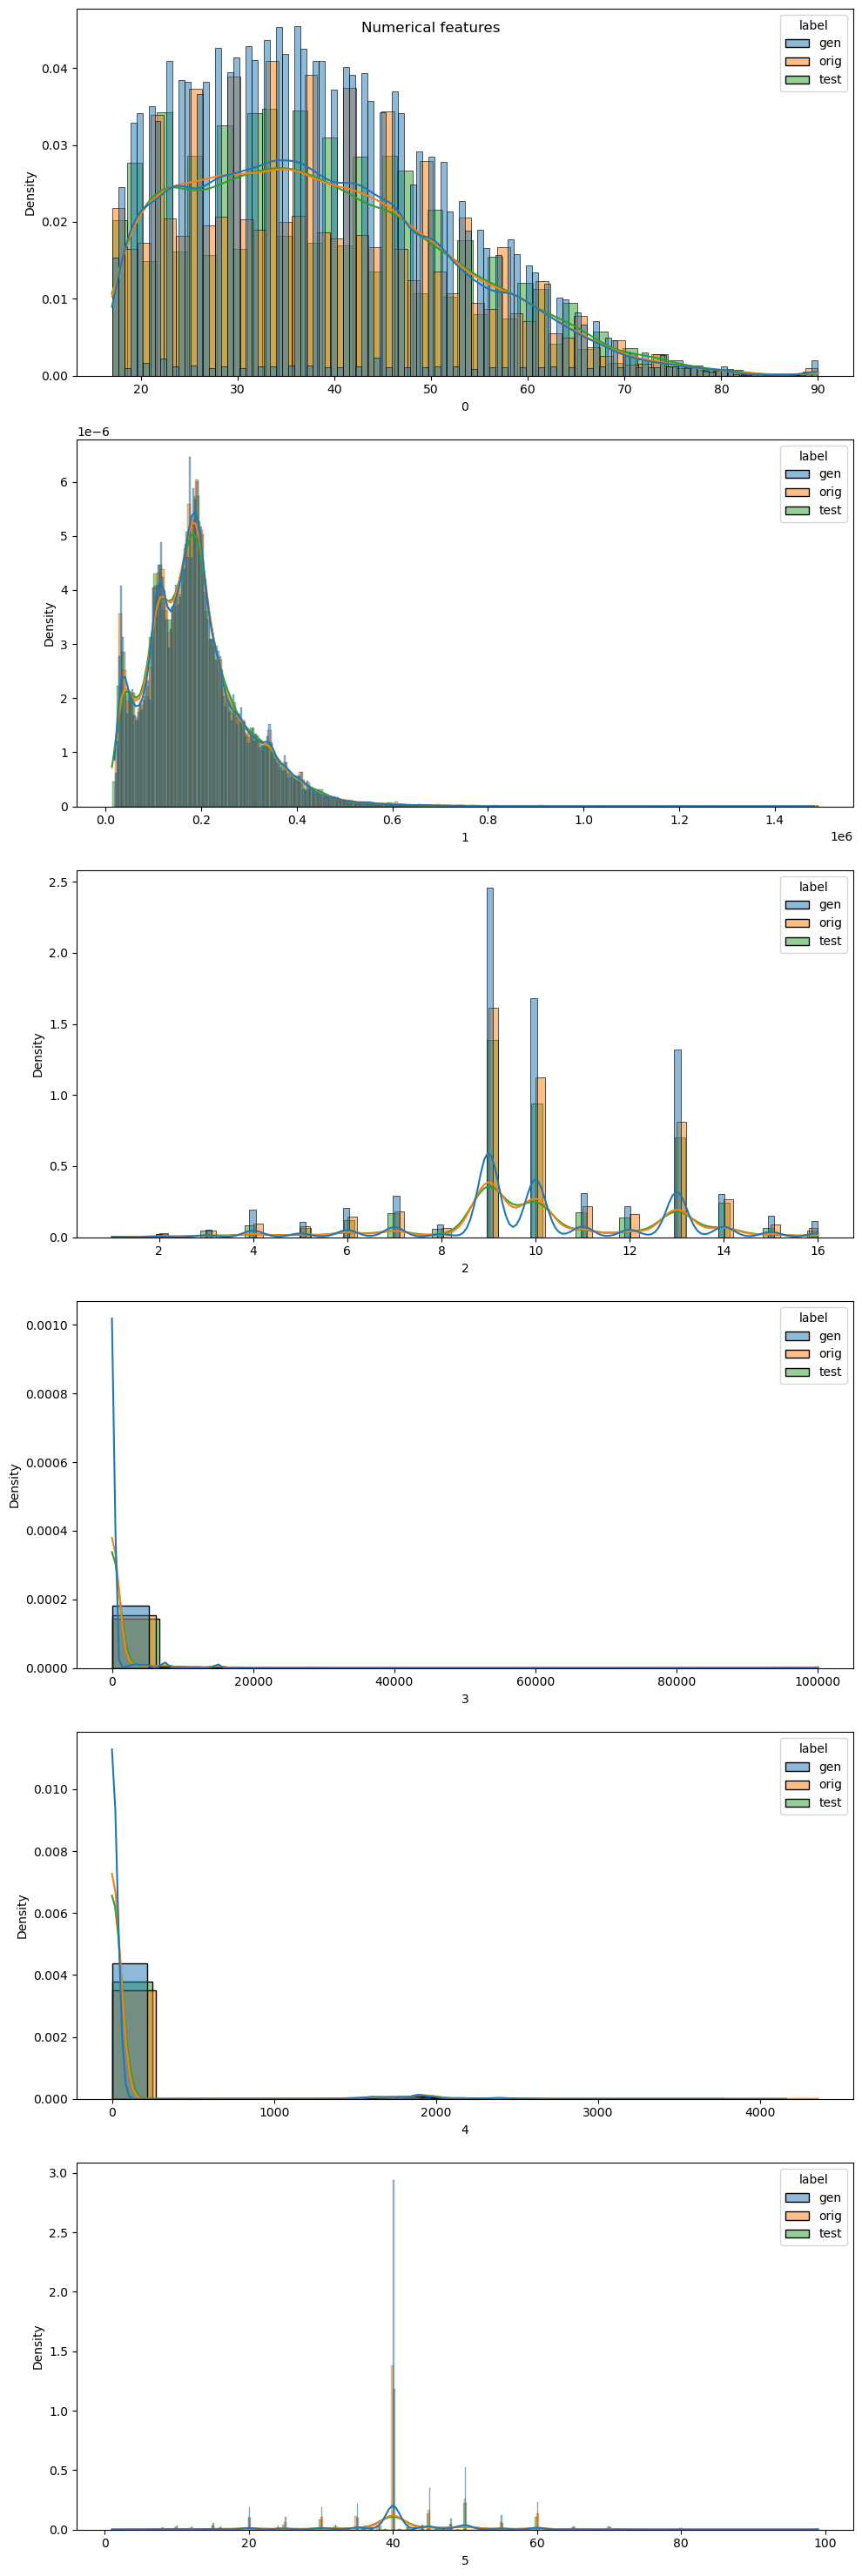

In [21]:
cols = range(X_num_gen.shape[1])
fig = plt.figure(figsize=(10, 5*len(cols)))
for col in cols:
    plt.subplot(len(cols), 1, col+1)
    sns.histplot(data=df_num, x=col, hue='label', stat='density', common_bins=False, common_norm=False, kde=True)
plt.suptitle("Numerical features")
plt.tight_layout()

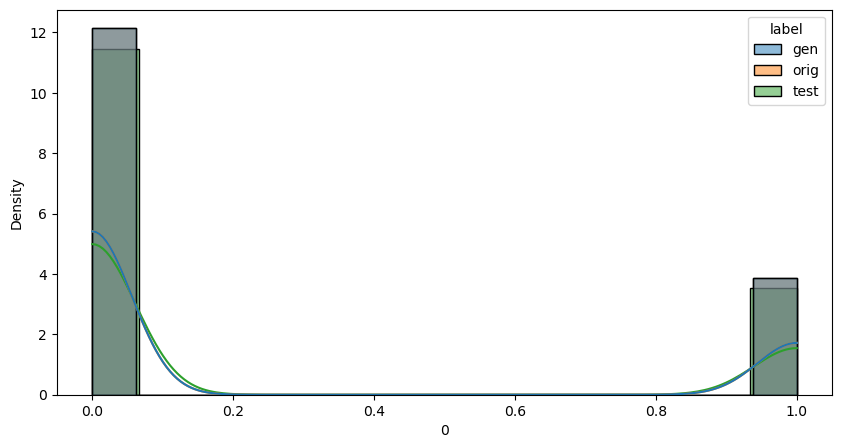

In [17]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_y, x=0, hue='label', stat='density', common_bins=False, common_norm=False, kde=True)
plt.show()

/tmp/ipykernel_1934859/2476661427.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  p.set_xticklabels(p.get_xticklabels(), rotation=45)


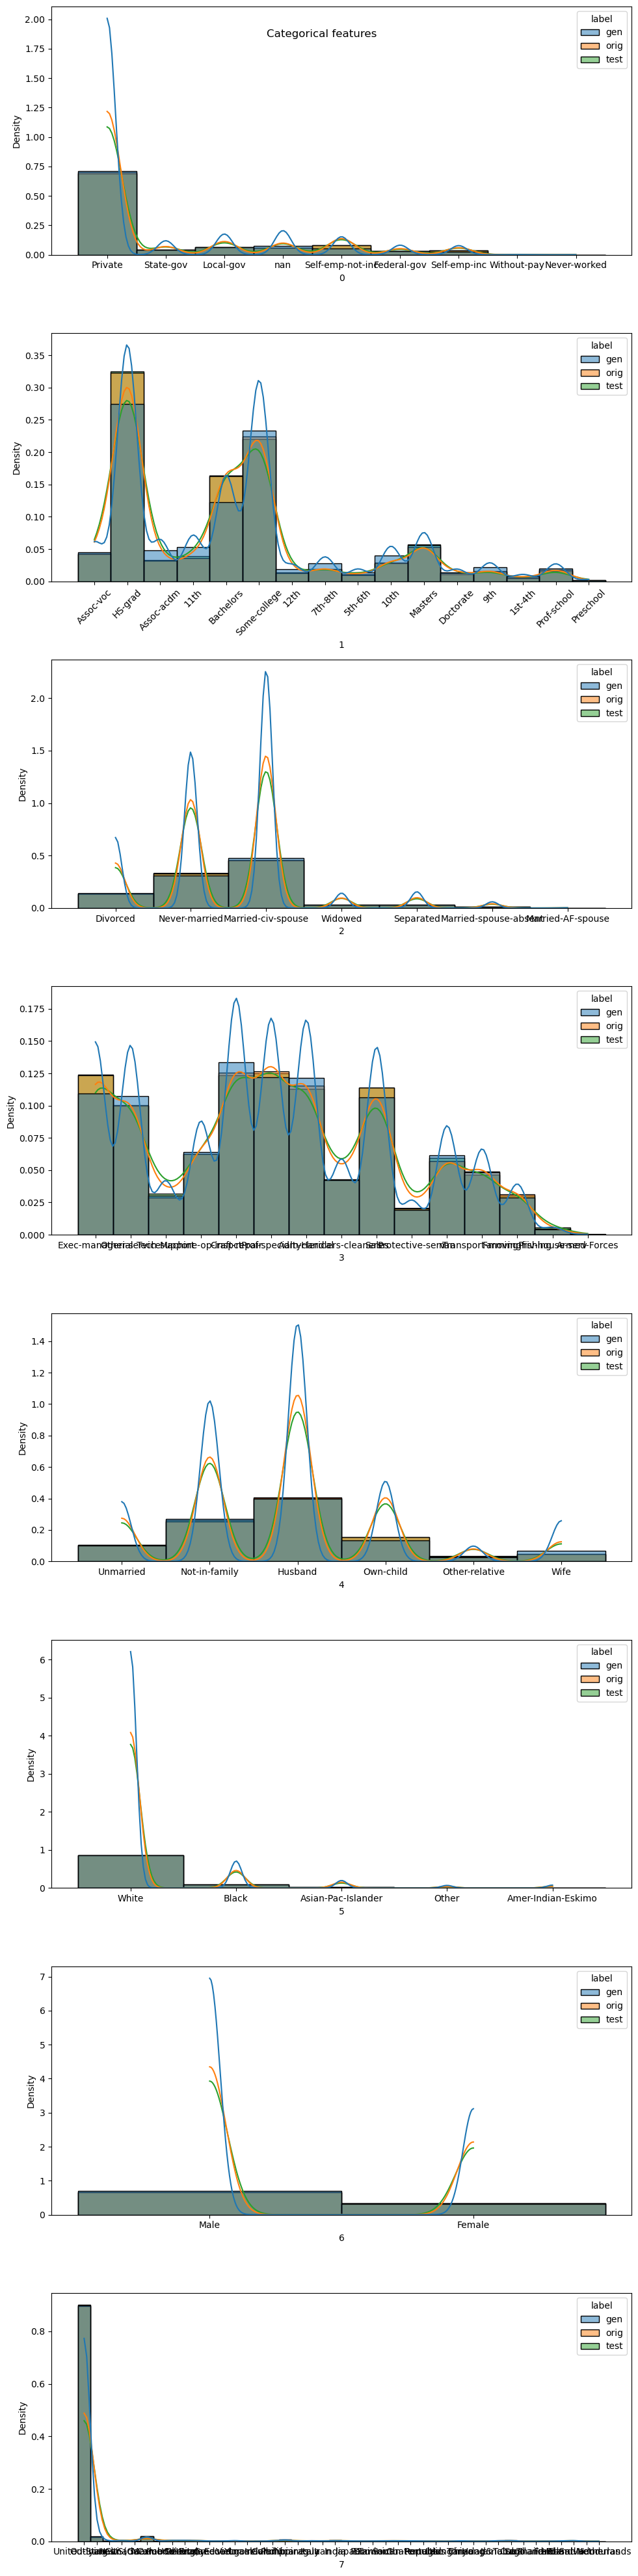

In [18]:
cols = range(X_cat_gen.shape[1])
fig = plt.figure(figsize=(10, 5*len(cols)))
for col in cols:
    plt.subplot(len(cols), 1, col+1)
    p = sns.histplot(data=df_cat, x=col, hue='label', stat='density', common_bins=False, common_norm=False, kde=True)
    if col == 1:
        p.set_xticklabels(p.get_xticklabels(), rotation=45)
plt.suptitle("Categorical features")
plt.tight_layout()

In [7]:
# 2d sns plot
sns.jointplot(x=X_num_gen[:, 0], y=X_num_gen[:, 1], kind="kde")